In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from pathlib import Path

In [4]:
from analytic import potentialsDC

In [5]:
from analytic import hessiansDC

In [10]:
from analytic import pseudoPotential

In [7]:
np.diag(hessiansDC.E1(0, 0, 51.5e-6)).sum()

0.0

In [13]:
pseudoPotential.ps0(0, 0, 51.5e-6, 40, )

9.58891264046375e-06

In [50]:
def affine(X, Y, x0, y0, theta):
    ct, st = np.cos(theta), np.sin(theta)
    X1 = X - x0
    Y1 = Y - y0
    return ct*X1 + st*Y1, st*X1 - ct*Y1

In [180]:
def ellipsoid(X, Y, a, b, x0, y0, theta):
    X1, Y1 = affine(X, Y, x0, y0, theta)
    return a*X1**2 + b*Y1**2

In [198]:
# y = np.linspace(-10, 10, 100) * 1e-6
# z = np.linspace(40, 60, 100) * 1e-6

y = np.linspace(-3, 3, 100) * 1e-6
z = np.linspace(47, 55, 100) * 1e-6

Y, Z = np.meshgrid(y, z)


In [199]:
import lmfit
from scipy.optimize import minimize

In [200]:
def fun(xy, x):
    return pseudoPotential.ps0(x, xy[0], xy[1], Vrf, omega)

# def jac(xy):
#     return -pseudoPotential.ps1(250e-6, xy[0], xy[1], Vrf, omega)[1:]

In [205]:
# x = np.linspace(0, 250, 50) * 1e-6
x = np.asarray([250e-6])

null_z = np.empty_like(x)

x0 = [0, 50e-6]    

for j, _x in enumerate(x):
    res = minimize(fun, x0, args=(_x,), method='Nelder-Mead', options=dict(fatol=1e-7, xatol=1e-7))
    null_z[j] = res.x[1]

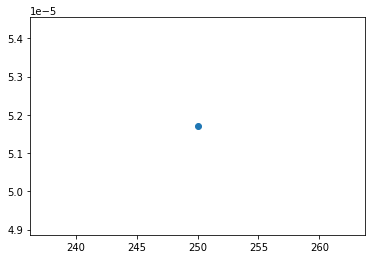

In [207]:
plt.plot(x*1e6, null_z, 'o')

In [217]:
H = pseudoPotential.ps2(250e-6, *res.x, Vrf, omega)

In [218]:
H

array([[ 1.19280083e-01, -8.55811452e-04,  2.19969701e+01],
       [-8.55811452e-04,  5.13657748e+08,  2.04088673e+04],
       [ 2.19969701e+01,  2.04088673e+04,  5.12865404e+08]])

In [219]:
h1 = H[1:, 1:]
h1

array([[5.13657748e+08, 2.04088673e+04],
       [2.04088673e+04, 5.12865404e+08]])

In [220]:
np.linalg.eig(h1)

(array([5.13658273e+08, 5.12864879e+08]), array([[ 0.99966888, -0.025732  ],
        [ 0.025732  ,  0.99966888]]))

In [209]:
M = lmfit.Model(ellipsoid, independent_vars=['X', 'Y'])

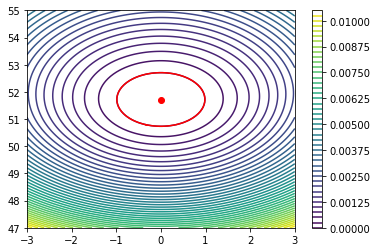

In [234]:
Vrf = 40
omega = 2 * np.pi * 34e6


ps = pseudoPotential.ps0(250e-6, Y, Z, Vrf, omega)

c0 = plt.contour(Y*1e6, Z*1e6, ps, 50)
plt.colorbar(c0)

plt.plot(*(res.x*1e6), 'or')

plt.plot(*contour1.T, 'r')

In [225]:
c0.allsegs.shape

AttributeError: 'list' object has no attribute 'shape'

In [227]:
c0.levels

array([0.     , 0.00025, 0.0005 , 0.00075, 0.001  , 0.00125, 0.0015 ,
       0.00175, 0.002  , 0.00225, 0.0025 , 0.00275, 0.003  , 0.00325,
       0.0035 , 0.00375, 0.004  , 0.00425, 0.0045 , 0.00475, 0.005  ,
       0.00525, 0.0055 , 0.00575, 0.006  , 0.00625, 0.0065 , 0.00675,
       0.007  , 0.00725, 0.0075 , 0.00775, 0.008  , 0.00825, 0.0085 ,
       0.00875, 0.009  , 0.00925, 0.0095 , 0.00975, 0.01   , 0.01025,
       0.0105 ])

In [232]:
contour1 = c0.allsegs[1][0]

In [211]:
p0 = M.make_params(a=1e8, b=1e8)
p0['theta'].set(value=0, min=0, max=2*np.pi)
p0['x0'].set(value=res.x[0], vary=False)
p0['y0'].set(value=res.x[1], vary=False)

In [212]:
fres = M.fit(ps, p0, X=Y, Y=Z, fit_kws=dict(ftol=1e-7, xtol=1e-7))

In [213]:
fres_xy = np.asarray([fres.params['x0'].value, fres.params['y0'].value])

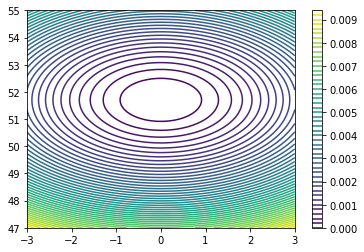

In [214]:
c = plt.contour(Y*1e6, Z*1e6, fres.best_fit, 50)
plt.colorbar(c)

In [215]:
1 / fres.params['a'].value**2

1.7397783809056455e-17

In [216]:
fres.params

name,value,standard error,relative error,initial value,min,max,vary
a,2.3975e+08,1117099.03,(0.47%),100000000.0,-inf,inf,True
b,3.1874e+08,553991.455,(0.17%),100000000.0,-inf,inf,True
x0,-6.8545e-10,0.00000000,(0.00%),-6.854534149169895e-10,-inf,inf,False
y0,5.1706e-05,0.00000000,(0.00%),5.1706431955099106e-05,-inf,inf,False
theta,3.14233429,0.00591497,(0.19%),0,0.00000000,6.28318531,True


## Plot xline

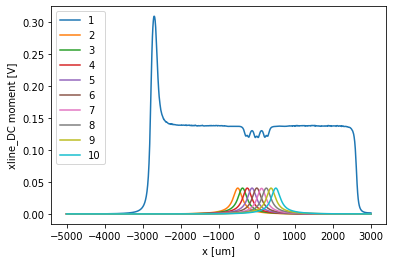

In [4]:
fig, ax = plt.subplots()

for electrode_n in range(1, 11):
    fpath = Path('.') / 'csv' / f'Axial2QubitTrap_xline_DC{electrode_n}.csv'

    x, v = np.loadtxt(fpath, comments='%', delimiter=',', unpack=True)

    ax.plot(-x, v, label=electrode_n)
ax.set(xlabel='x [um]', ylabel='xline_DC moment [V]')
ax.legend()

In [5]:
import potentialsDC

In [10]:
fpath = Path('.') / 'csv' / f'Axial2QubitTrap_xline_DC3.csv'
x, v = np.loadtxt(fpath, comments='%', delimiter=',', unpack=True)
x = -x

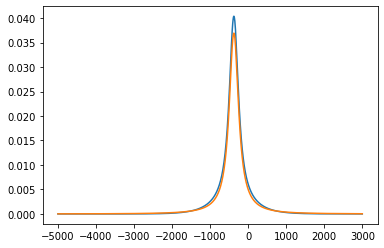

In [19]:
fig, ax = plt.subplots()
ax.plot(x, v)
ax.plot(x, potentialsDC.E3(x*1e-6, 0, 51.5e-6))

In [20]:
potentialsDC.

[<function potentialsDC.E1(x, y, z)>,
 <function potentialsDC.E2(x, y, z)>,
 <function potentialsDC.E3(x, y, z)>,
 <function potentialsDC.E4(x, y, z)>,
 <function potentialsDC.E5(x, y, z)>,
 <function potentialsDC.E6(x, y, z)>,
 <function potentialsDC.E7(x, y, z)>,
 <function potentialsDC.E8(x, y, z)>,
 <function potentialsDC.E9(x, y, z)>,
 <function potentialsDC.E10(x, y, z)>,
 <function potentialsDC.E11(x, y, z)>,
 <function potentialsDC.E12(x, y, z)>,
 <function potentialsDC.E13(x, y, z)>,
 <function potentialsDC.E14(x, y, z)>,
 <function potentialsDC.E15(x, y, z)>,
 <function potentialsDC.E16(x, y, z)>,
 <function potentialsDC.E17(x, y, z)>,
 <function potentialsDC.E18(x, y, z)>,
 <function potentialsDC.E19(x, y, z)>,
 <function potentialsDC.E20(x, y, z)>,
 <function potentialsDC.GND1(x, y, z)>,
 <function potentialsDC.GND2(x, y, z)>,
 <function potentialsDC.GND3(x, y, z)>]

### Compare x0

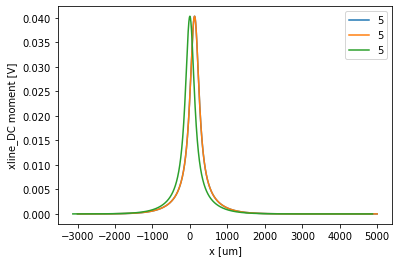

In [6]:
fig, ax = plt.subplots()

electrode_n = 5

for x0 in ['', 'x0-0', 'x0-125']:

    fpath = Path('.') / 'csv' / f'Axial2QubitTrap_xline_DC{electrode_n}{x0}.csv'

    x, v = np.loadtxt(fpath, comments='%', delimiter=',', unpack=True)

    ax.plot(x, v, label=electrode_n)
ax.set(xlabel='x [um]', ylabel='xline_DC moment [V]')
ax.legend()

## Plot planes

In [31]:
# fpath = Path('.') / 'csv' / 'normE_RF.csv'
fpath = Path('.') / 'csv' / 'VTilt.csv'
x, y, v = np.loadtxt(fpath, comments='%', delimiter=',', unpack=True)

In [32]:
x.nbytes

20000000

In [33]:
x.shape

(2500000,)

In [34]:
np.unique(x).shape

(500,)

In [35]:
np.unique(y).shape

(5000,)

In [36]:
%matplotlib notebook

In [37]:
shape = np.unique(x).shape + np.unique(y).shape

x = x.reshape(shape)
y = y.reshape(shape)

v = v.reshape(shape)

<IPython.core.display.Javascript object>


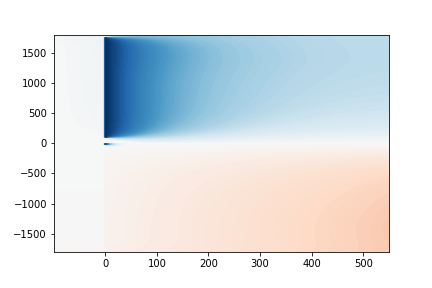

In [39]:
fig, ax = plt.subplots()
ax.contourf(x, y, v, 200, cmap='RdBu')

In [23]:
x

array([[-99.35, -98.05, -96.75, ..., 546.75, 548.05, 549.35],
       [-99.35, -98.05, -96.75, ..., 546.75, 548.05, 549.35],
       [-99.35, -98.05, -96.75, ..., 546.75, 548.05, 549.35],
       ...,
       [-99.35, -98.05, -96.75, ..., 546.75, 548.05, 549.35],
       [-99.35, -98.05, -96.75, ..., 546.75, 548.05, 549.35],
       [-99.35, -98.05, -96.75, ..., 546.75, 548.05, 549.35]])

<IPython.core.display.Javascript object>


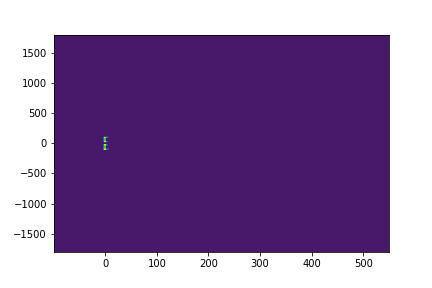

In [29]:
fig, ax = plt.subplots()
ax.contourf(x, y, v)